In [1]:
import jax
import jax.numpy as jnp
from matplotlib import pyplot as plt
import netket

/home/ewonisch/NeuralQuantumStates/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
key = jax.random.PRNGKey(1)

In [22]:
d = 2
N = 12
key, _ = jax.random.split(key)
K = jax.random.normal(key,  shape = (N, d))
key, _ = jax.random.split(key)
M = jax.random.normal(key,  shape = (N,))
def f(r):
    r = jnp.expand_dims(r, axis = -2)
    return jnp.sum(jnp.cos(jnp.sum(r * K, axis = -1) + M * jnp.pi), axis = -1)

In [23]:
N_c = 4
key, _ = jax.random.split(key)
U = jax.random.normal(key,  shape = (d, N_c))
def gamma(t):
    t = jnp.expand_dims(jnp.expand_dims(t, axis = -1), axis = -1)
    return jnp.sum(jnp.sin(t * U), axis = -1)

(-5.0, 5.0)

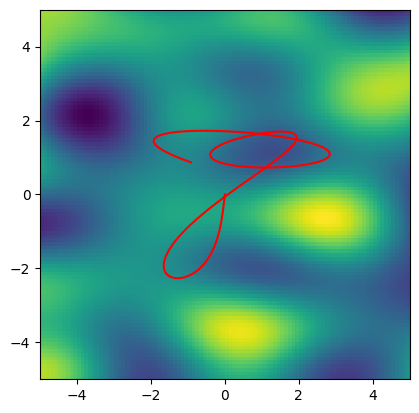

In [24]:
L = 5
xs = jnp.linspace(-L,L, num = 100)
xx, yy = jnp.meshgrid(xs,xs)
coord = jnp.stack((xx, yy), axis = -1)
im = f(coord.reshape((-1,d))).reshape(xx.shape)
plt.imshow(im, extent=[-L,L,-L,L])

ts = jnp.linspace(0, 10, num= 1000)
pos = gamma(ts)
plt.plot(pos[:,0], pos[:,1], color = "r")

plt.xlim(-L,L)
plt.ylim(-L,L)

### Total Derivative

In [80]:
t = 0
eps = 10**(-(jnp.arange(8*3)/3))
del_gamma = gamma(t+eps) - gamma(t)
del_f = f(gamma(t+eps))-f(gamma(t))
tot = del_f/eps

In [81]:
a = lambda t: f(gamma(t))
tot_correct = jax.jvp(a, [0.], [1.])[1]

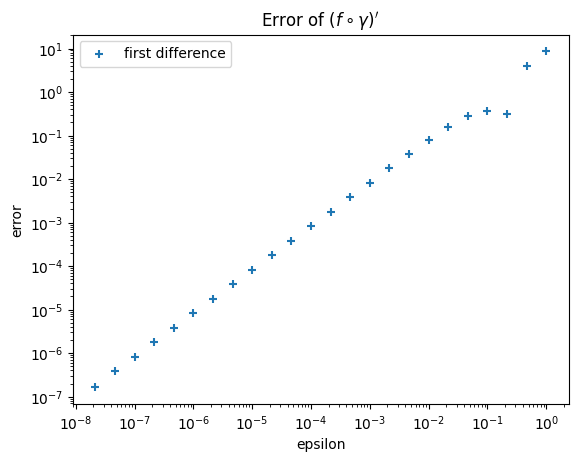

In [82]:
err = jnp.abs(tot - tot_correct)
plt.scatter(eps, err, marker = "+", label = "first difference")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("epsilon")
plt.ylabel("error")
plt.title("Error of $(f \\circ \\gamma)'$")
plt.legend()

### Directional Derivative

In [97]:
grad = jax.vjp(f, gamma(t))[1](jnp.ones(()))[0]
grad

Array([-0.10672792,  3.30443246], dtype=float64)

In [102]:
del_x = del_f/del_gamma[:,0]
del_y = del_f/del_gamma[:,1]

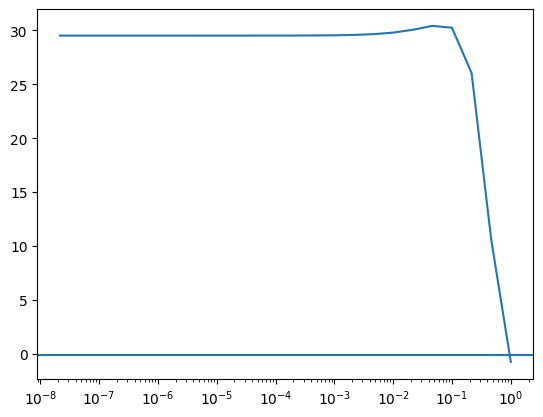

In [103]:
plt.plot(eps, del_x)
plt.axhline(grad[0])
plt.xscale("log")